<a href="https://colab.research.google.com/github/SpRingLJM/SpRingLJM/blob/main/HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Fetched 100 food items.
Please enter your health information.
Gender (Male/Female): Male
Systolic Blood Pressure (mmHg): 70
Diastolic Blood Pressure (mmHg): 120
Fasting Blood Sugar (mg/dL): 70
Total Cholesterol (mg/dL): 80
HDL Cholesterol (mg/dL): 60
LDL Cholesterol (mg/dL): 50
Triglycerides (mg/dL): 79
AST (SGOT) (U/L): 40
ALT (SGPT) (U/L): 55
Gamma-GTP (γ-GTP) (U/L): 60

✅ Chart saved: health_charts/2025-03-22_health_chart.png


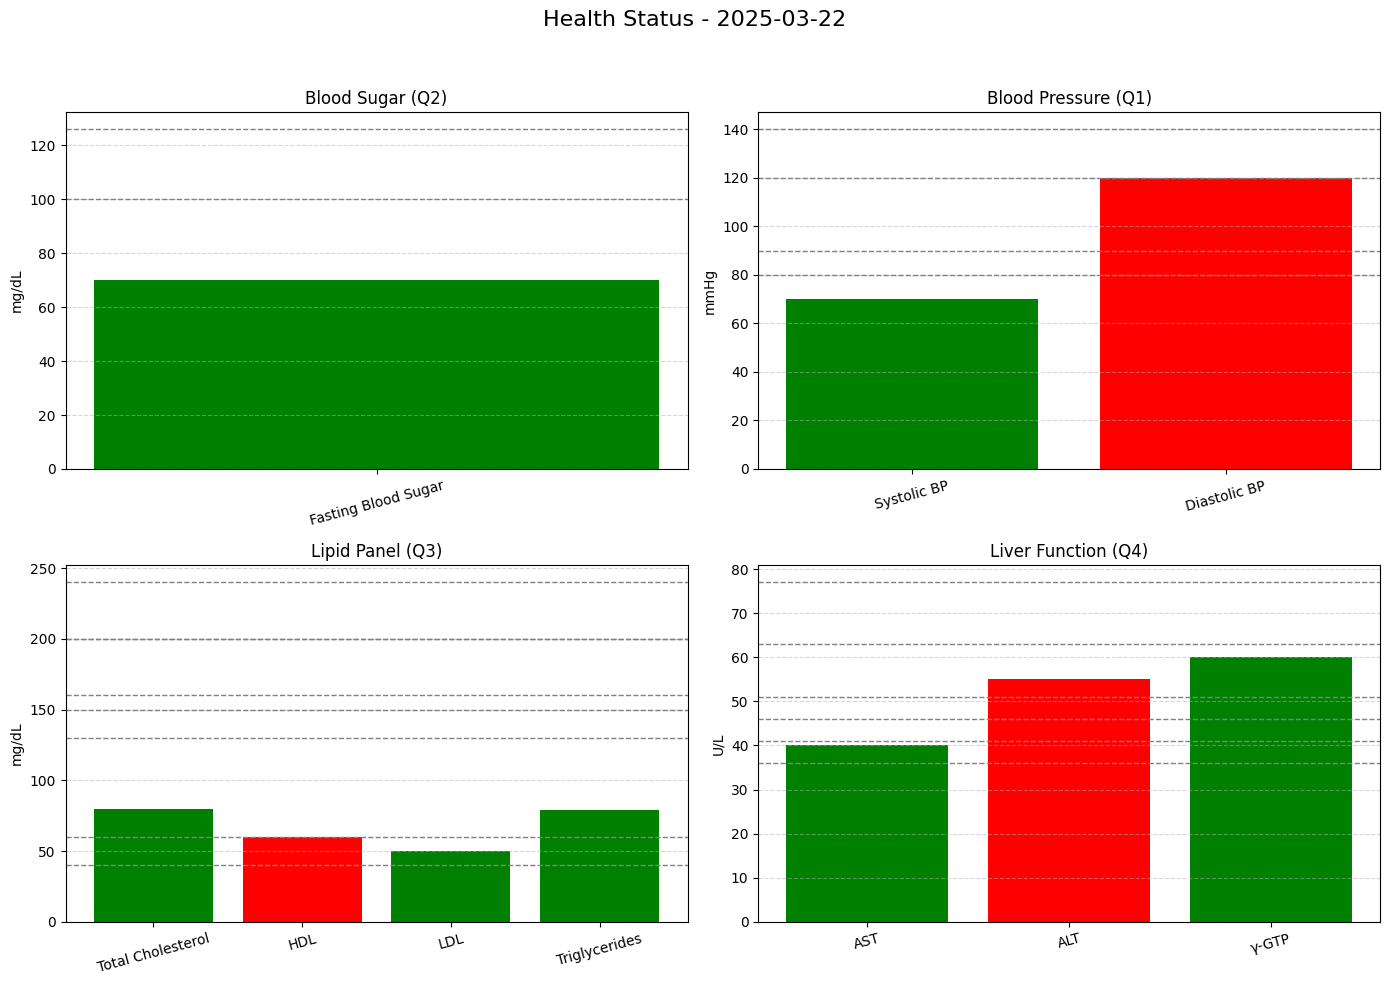


▶ Health Evaluation
Systolic BP: 70.0 → Normal
Diastolic BP: 120.0 → Danger
Fasting Blood Sugar: 70.0 → Normal
Total Cholesterol: 80.0 → Normal
HDL: 60.0 → Danger
LDL: 50.0 → Normal
Triglycerides: 79.0 → Normal
AST: 40.0 → Normal
ALT: 55.0 → Danger
γ-GTP: 60.0 → Normal

▶ Recommended Foods:
  Food Name  Energy (kcal)  Fat (g)  Protein (g)  Sugar (g)  Sodium (mg)  \
0   파슬리_말린것          298.0     3.41        20.16       5.67        630.0   
1     열무_생것           14.0     0.21         2.08       0.00         48.0   

   Cholesterol (mg)  
0               0.0  
1               0.0  


In [ ]:
import pandas as pd
import requests
import urllib.parse
import matplotlib.pyplot as plt
from datetime import datetime
import os

# ===== Font and graph settings =====
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# ===== User health input =====
# Gender : 성별, Systolic BP : 혈압(수축기), Diastolic BP : 혈압(이완기)
# Fasting Blood Sugar : 공복혈당
# Total Cholesterol : 총 콜레스테롤, HDL, LDL -> 콜레스테롤 수치들, Triglycerides : 중성지방
# AST, ALT, y-GPT : 간장질환 관련 수치값
def get_user_health_data():
    print("Please enter your health information.")
    gender = input("Gender (Male/Female): ").strip().lower()

    data = {
        "gender": gender,
        "date": datetime.today().strftime('%Y-%m-%d'),
        "Systolic BP": float(input("Systolic Blood Pressure (mmHg): ")),
        "Diastolic BP": float(input("Diastolic Blood Pressure (mmHg): ")),
        "Fasting Blood Sugar": float(input("Fasting Blood Sugar (mg/dL): ")),
        "Total Cholesterol": float(input("Total Cholesterol (mg/dL): ")),
        "HDL": float(input("HDL Cholesterol (mg/dL): ")),
        "LDL": float(input("LDL Cholesterol (mg/dL): ")),
        "Triglycerides": float(input("Triglycerides (mg/dL): ")),
        "AST": float(input("AST (SGOT) (U/L): ")),
        "ALT": float(input("ALT (SGPT) (U/L): ")),
        "γ-GPT": float(input("Gamma-GPT (γ-GPT) (U/L): "))
    }
    return data

# ===== Health evaluation criteria =====
def categorize(value, ranges):
    if isinstance(ranges[0], tuple):
        if ranges[0][0] <= value <= ranges[0][1]:
            return "Normal"
        elif ranges[1][0] <= value <= ranges[1][1]:
            return "Warning"
        else:
            return "Danger"
    else:
        if value < ranges[0]:
            return "Normal"
        elif value < ranges[1]:
            return "Warning"
        else:
            return "Danger"

# ===== Health status evaluation =====
def evaluate_health(data):
    gender = data["gender"]
    result = {}

    result["Systolic BP"] = categorize(data["Systolic BP"], [120, 140])
    result["Diastolic BP"] = categorize(data["Diastolic BP"], [80, 90])
    result["Fasting Blood Sugar"] = categorize(data["Fasting Blood Sugar"], [100, 126])
    result["Total Cholesterol"] = categorize(data["Total Cholesterol"], [200, 240])
    result["HDL"] = categorize(data["HDL"], [40, 60])
    result["LDL"] = categorize(data["LDL"], [130, 160])
    result["Triglycerides"] = categorize(data["Triglycerides"], [150, 200])
    result["AST"] = categorize(data["AST"], [41, 51])
    result["ALT"] = categorize(data["ALT"], [36, 46])

    if gender == "male":
        result["γ-GPT"] = categorize(data["γ-GPT"], [(11, 63), (64, 77)])
    else:
        result["γ-GPT"] = categorize(data["γ-GPT"], [(8, 35), (36, 45)])

    return result

# ===== Health status visualization (quadrant chart) =====
def visualize_quadrant_health(data, status, date):
    color_map = {"Normal": "green", "Warning": "orange", "Danger": "red"}

    group_data = {
        "Blood Pressure (Q1)": {
            "items": ["Systolic BP", "Diastolic BP"],
            "unit": "mmHg",
            "thresholds": {"Systolic BP": [120, 140], "Diastolic BP": [80, 90]},
        },
        "Blood Sugar (Q2)": {
            "items": ["Fasting Blood Sugar"],
            "unit": "mg/dL",
            "thresholds": {"Fasting Blood Sugar": [100, 126]},
        },
        "Lipid Panel (Q3)": {
            "items": ["Total Cholesterol", "HDL", "LDL", "Triglycerides"],
            "unit": "mg/dL",
            "thresholds": {
                "Total Cholesterol": [200, 240],
                "HDL": [40, 60],
                "LDL": [130, 160],
                "Triglycerides": [150, 200],
            },
        },
        "Liver Function (Q4)": {
            "items": ["AST", "ALT", "γ-GPT"],
            "unit": "U/L",
            "thresholds": {
                "AST": [41, 51],
                "ALT": [36, 46],
                "γ-GPT": [(11, 63), (64, 77)] if data["gender"] == "male" else [(8, 35), (36, 45)],
            },
        }
    }

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Health Status - {date}", fontsize=16)

    pos_map = {
        "Blood Pressure (Q1)": (0, 1),
        "Blood Sugar (Q2)": (0, 0),
        "Lipid Panel (Q3)": (1, 0),
        "Liver Function (Q4)": (1, 1)
    }

    for title, info in group_data.items():
        row, col = pos_map[title]
        ax = axes[row][col]
        items = info["items"]
        vals = [data[i] for i in items]
        colors = [color_map[status[i]] for i in items]
        ax.bar(items, vals, color=colors)
        ax.set_title(title)
        ax.set_ylabel(info["unit"])
        ax.grid(True, axis='y', linestyle='--', alpha=0.5)
        ax.tick_params(axis='x', rotation=15)

        for i, label in enumerate(items):
            thresholds = info["thresholds"][label]
            if isinstance(thresholds[0], tuple):
                for thr in thresholds:
                    ax.axhline(y=thr[1], color="gray", linestyle="--", linewidth=1)
            else:
                for thr in thresholds:
                    ax.axhline(y=thr, color="gray", linestyle="--", linewidth=1)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    folder = "health_charts"
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, f"{date}_health_chart.png")
    plt.savefig(filepath)
    print(f"\n✅ Chart saved: {filepath}")
    plt.show()

# ===== Public API (Food data) =====
service_key = "20WKpXHVqkTEZZznZFREj4%2BHbPL8gRr5OqjUNUYNfJ9calBg2E6iAaTXQK5SC3CGKFJ7g%2BgYFMzYd36bnLU1IA%3D%3D"
decoded_key = urllib.parse.unquote(service_key)

url = "http://api.data.go.kr/openapi/tn_pubr_public_nutri_material_info_api"
params = {
    "serviceKey": decoded_key,
    "pageNo": 1,
    "numOfRows": 100,
    "type": "json"
}

response = requests.get(url, params=params)
df_food = pd.DataFrame()

if response.status_code == 200:
    items = response.json().get("response", {}).get("body", {}).get("items", [])
    df_food = pd.DataFrame(items)
    print(f"\nFetched {len(df_food)} food items.")
else:
    print("API request failed:", response.status_code)

# ===== Food recommendation logic =====
def recommend_foods(health_data, food_df, max_results=10):
    results = []
    for _, row in food_df.iterrows():
        try:
            name = row.get("foodNm", "Unknown")
            enerc = float(row.get("enerc", 0))
            fat = float(row.get("fatce", 0))
            prot = float(row.get("prot", 0))
            sugar = float(row.get("sugar", 0))
            nat = float(row.get("nat", 0))
            chole = float(row.get("chole", 0))
        except:
            continue

        if health_data["Fasting Blood Sugar"] > 126 and sugar <= 15:
            results.append((name, enerc, fat, prot, sugar, nat, chole))
        elif health_data["Total Cholesterol"] > 240 and fat <= 15 and chole <= 100:
            results.append((name, enerc, fat, prot, sugar, nat, chole))
        elif health_data["Diastolic BP"] > 90 and nat <= 300:
            results.append((name, enerc, fat, prot, sugar, nat, chole))
        elif health_data["ALT"] > 46 and prot >= 3:
            results.append((name, enerc, fat, prot, sugar, nat, chole))

        if len(results) >= max_results:
            break

    return pd.DataFrame(results, columns=[
        "Food Name", "Energy (kcal)", "Fat (g)", "Protein (g)", "Sugar (g)", "Sodium (mg)", "Cholesterol (mg)"
    ])

# ===== Main Execution =====
user_data = get_user_health_data()
health_status = evaluate_health(user_data)
visualize_quadrant_health(user_data, health_status, user_data["date"])

print("\n▶ Health Evaluation")
for item, status in health_status.items():
    print(f"{item}: {user_data[item]} → {status}")

if not df_food.empty:
    recommended_df = recommend_foods(user_data, df_food)
    if not recommended_df.empty:
        print("\n▶ Recommended Foods:")
        print(recommended_df)
    else:
        print("\nNo suitable food found based on your health data.")
